In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%matplotlib widget
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score

In [2]:
data = pd.read_csv("/mnt/Data/code/machine_learning/course/intro_to_ML/intro_to_ML/project/CC GENERAL.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
data.drop(columns=['CUST_ID'], inplace=True)

In [5]:
data.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
print(data["CREDIT_LIMIT"].value_counts())
data["CREDIT_LIMIT"].fillna(data["CREDIT_LIMIT"].mode()[0], inplace=True)

3000.000000     784
1500.000000     722
1200.000000     621
1000.000000     614
2500.000000     612
               ... 
9200.000000       1
13550.000000      1
7227.272727       1
11250.000000      1
1833.333333       1
Name: CREDIT_LIMIT, Length: 205, dtype: int64


In [7]:
print(data["MINIMUM_PAYMENTS"].value_counts())
data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].mean(), inplace=True)

299.351881    2
342.286490    1
184.464721    1
276.486072    1
309.140865    1
             ..
181.773223    1
711.894455    1
256.522546    1
127.799107    1
88.288956     1
Name: MINIMUM_PAYMENTS, Length: 8636, dtype: int64


In [8]:
data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
len(data)

8950

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


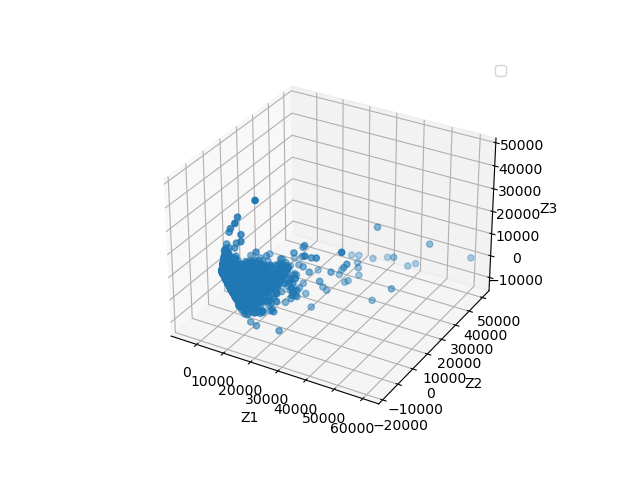

In [10]:
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(data)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2])
ax.set_xlabel('Z1')
ax.set_ylabel('Z2')
ax.set_zlabel('Z3')
ax.legend()
plt.show()

In [11]:
num_clusters = range(2, 21)
score_history = dict()

for k in num_clusters:
    agglo = AgglomerativeClustering(n_clusters=k, compute_distances=True)
    y_pred = agglo.fit_predict(data)

    score = davies_bouldin_score(data, y_pred)
    score_history[k] = score

    print(f"Number of clusters: {k}, Davies-Bouldin score: {score}")

Number of clusters: 2, Davies-Bouldin score: 1.2734456514009265
Number of clusters: 3, Davies-Bouldin score: 1.0137390195487326
Number of clusters: 4, Davies-Bouldin score: 1.4903713758962311
Number of clusters: 5, Davies-Bouldin score: 1.3750689583931042
Number of clusters: 6, Davies-Bouldin score: 1.3050250121786457
Number of clusters: 7, Davies-Bouldin score: 1.3238871701093051
Number of clusters: 8, Davies-Bouldin score: 1.2219361135433109
Number of clusters: 9, Davies-Bouldin score: 1.1303800763903498
Number of clusters: 10, Davies-Bouldin score: 1.2139670355680938
Number of clusters: 11, Davies-Bouldin score: 1.2641664525953553
Number of clusters: 12, Davies-Bouldin score: 1.213566154931625
Number of clusters: 13, Davies-Bouldin score: 1.317508827954889
Number of clusters: 14, Davies-Bouldin score: 1.290282307464474
Number of clusters: 15, Davies-Bouldin score: 1.3018584433563176
Number of clusters: 16, Davies-Bouldin score: 1.2735510626516877
Number of clusters: 17, Davies-Bould

3


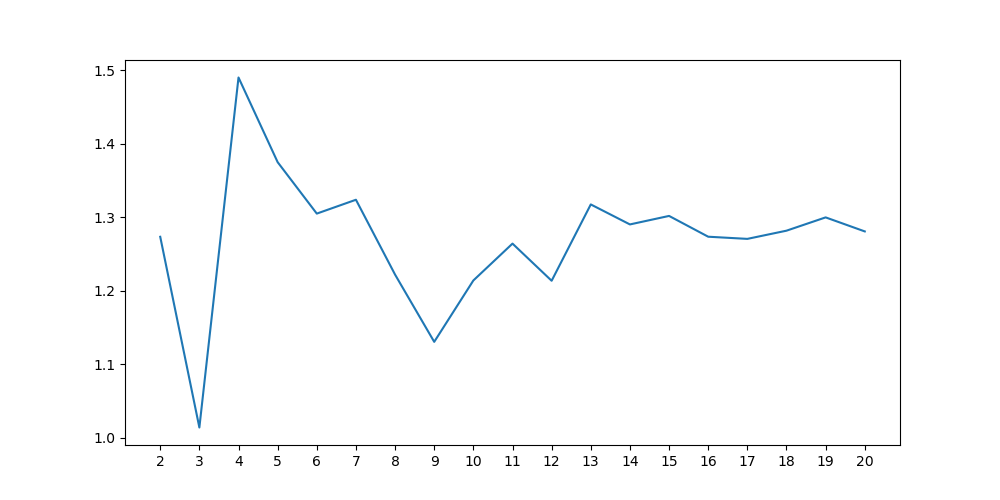

In [12]:
x = list(score_history.keys())
y = list(score_history.values())

num_cluster = x[np.argmin(y)]
print(num_cluster)

plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.xticks(x)
plt.show()

In [13]:
agglo = AgglomerativeClustering(n_clusters=num_cluster, compute_distances=True)
y_pred = agglo.fit_predict(data).reshape(-1, 1)

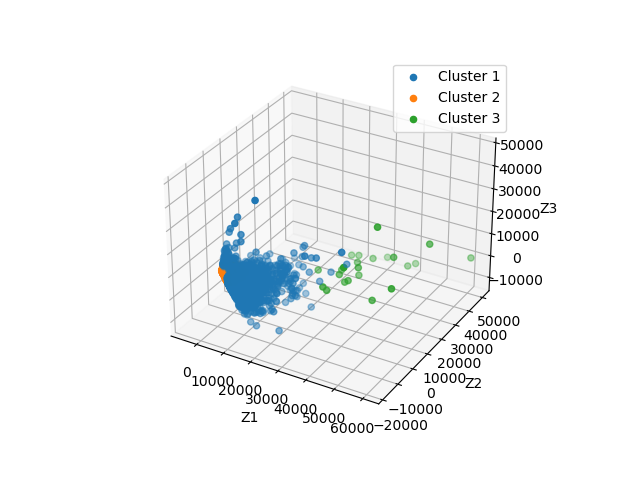

In [14]:
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(data)
X = np.concatenate([X_reduced, y_pred], axis=1)

fig = plt.figure()
ax = plt.axes(projection="3d")
colors = list(mcolors.TABLEAU_COLORS.keys())
for k in range(num_cluster):
    rows = np.where(X[:, 3] == k)
    ax.scatter3D(X[rows][:, 0], X[rows][:, 1], X[rows][:, 2], label=f"Cluster {k+1}", color=colors[k])
ax.set_xlabel("Z1")
ax.set_ylabel("Z2")
ax.set_zlabel("Z3")
ax.legend()
plt.show()

In [15]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)
    
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel("Number of points in node")
    plt.show()

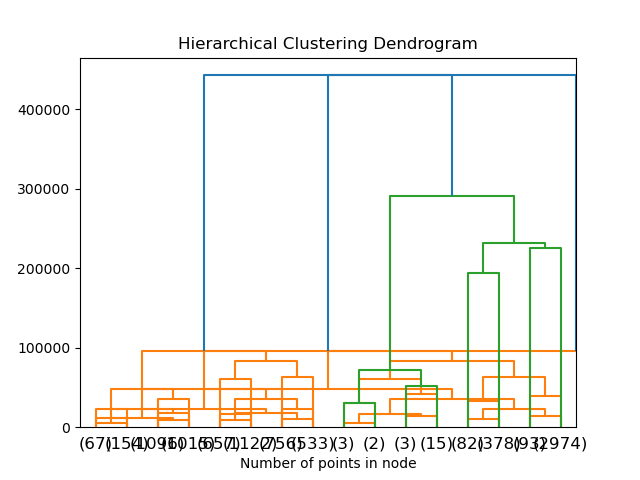

In [20]:
plot_dendrogram(agglo, truncate_mode='level', p=3)

In [21]:
num_clusters = range(2, 21)
score_history = dict()

for k in num_clusters:
    agglo = AgglomerativeClustering(n_clusters=k, compute_distances=True)
    y_pred = agglo.fit_predict(data)

    score = silhouette_score(data, y_pred)
    score_history[k] = score

    print(f"Number of clusters: {k}, Silhouette score: {score}")

Number of clusters: 2, Silhouette score: 0.3837687973292842
Number of clusters: 3, Silhouette score: 0.3882952147572531
Number of clusters: 4, Silhouette score: 0.38152352672407885
Number of clusters: 5, Silhouette score: 0.3888545148356347
Number of clusters: 6, Silhouette score: 0.3929002649571031
Number of clusters: 7, Silhouette score: 0.38231547141432115
Number of clusters: 8, Silhouette score: 0.3886795921425801
Number of clusters: 9, Silhouette score: 0.3905214965703059
Number of clusters: 10, Silhouette score: 0.3716700836306351
Number of clusters: 11, Silhouette score: 0.3691844529484009
Number of clusters: 12, Silhouette score: 0.3747916740680738
Number of clusters: 13, Silhouette score: 0.16622012352971158
Number of clusters: 14, Silhouette score: 0.16684678066944483
Number of clusters: 15, Silhouette score: 0.16824627783955823
Number of clusters: 16, Silhouette score: 0.17284536543732745
Number of clusters: 17, Silhouette score: 0.15969500465549025
Number of clusters: 18, S

In [22]:
x = list(score_history.keys())
y = list(score_history.values())

num_cluster = x[np.argmax(y)]
print(num_cluster)

6


In [23]:
agglo = AgglomerativeClustering(n_clusters=num_cluster, compute_distances=True)
y_pred = agglo.fit_predict(data).reshape(-1, 1)

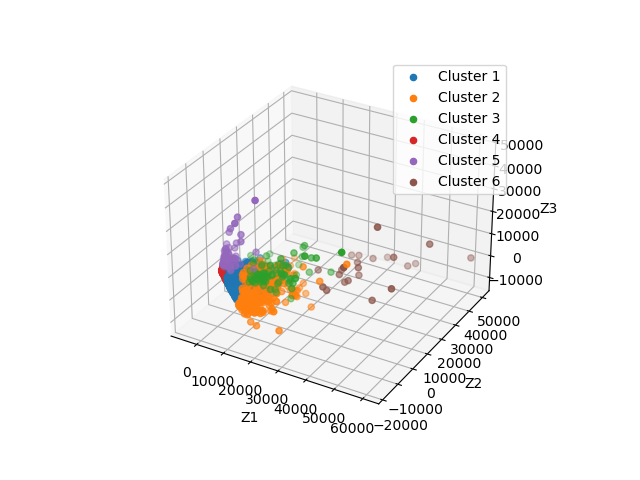

In [24]:
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(data)
X = np.concatenate([X_reduced, y_pred], axis=1)

fig = plt.figure()
ax = plt.axes(projection="3d")
colors = list(mcolors.TABLEAU_COLORS.keys())
for k in range(num_cluster):
    rows = np.where(X[:, 3] == k)
    ax.scatter3D(X[rows][:, 0], X[rows][:, 1], X[rows][:, 2], label=f"Cluster {k+1}", color=colors[k])
ax.set_xlabel("Z1")
ax.set_ylabel("Z2")
ax.set_zlabel("Z3")
ax.legend()
plt.show()